# 1. Level 2, Task 2: Classification with Logistic Regression
### 1.1 📌 Introduction

The Iris dataset is one of the most recognized datasets in statistics and machine learning. First introduced by Ronald A. Fisher in 1936, it contains 150 observations of iris flowers, equally distributed across three species: Iris setosa, Iris versicolor, and Iris virginica. Each observation includes four numerical features: sepal length, sepal width, petal length, and petal width.

Because of its simplicity, balanced structure, and clear class boundaries, the dataset is often used as a beginner-friendly resource for practicing exploratory data analysis (EDA), visualization, and classification modeling.
---
### 1.2 🔍 Problem Statement

Correctly identifying the species of an iris flower based on its measurements can be a challenge without prior botanical knowledge. Manual classification is inefficient and prone to errors, especially when dealing with large datasets. There is a need for a data-driven approach to classify flower species accurately using measurable features.

### 1.3🎯 Objectives

The main objectives of this project are to:

* Explore the dataset through statistical summaries and visualizations to understand the distribution of features.

* Identify patterns and relationships between flower species and their respective measurements.

* Apply classification techniques, that is, Logistic Regression, to predict iris species based on feature inputs.

* Evaluate model performance using accuracy, precision, recall, and other metrics.

* Highlight insights that demonstrate how simple feature measurements can reliably separate flower species.



## 2. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.Loading the dataset

In [ ]:
df = pd.read_csv('/content/1) iris.csv')

## 4. Checking the data

In [ ]:
# we are going to see how the first 5 rows look like
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# now, the last 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# we want to know how many rows and coluns we are handling
df.shape

(150, 5)

There are 150 rows and 5 columns

In [ ]:
# getting the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are a total of 5 columns, 4 are float values (numerical) and 1 is categorical.

In [ ]:
# checking the summary of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5. Data Cleaning



In [ ]:
# checking for missing values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There are no missing values

In [ ]:
# checking for duplicates
df.duplicated().sum()

np.int64(3)

There are 3 duplicated rows

In [ ]:
# We are now going to remove the duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
# we are going to check df.shape to see if the rows are removed
df.shape

(147, 5)

Three rows have been removed, now we are left with just 147.

## 6. Exploratory Data Analysis

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

###

### 6.1 Univariate Analysis

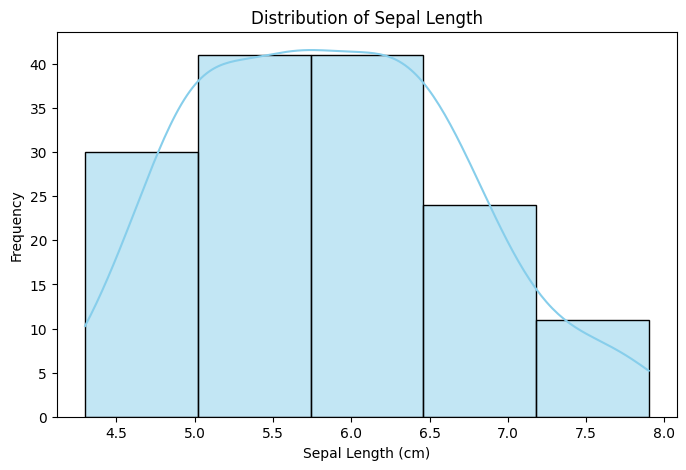

In [ ]:
# Distribution of sepal length
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal_length'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

The highest frequency is at 40 which ranges between the sepal length, between 5.0 - 6.5 cm

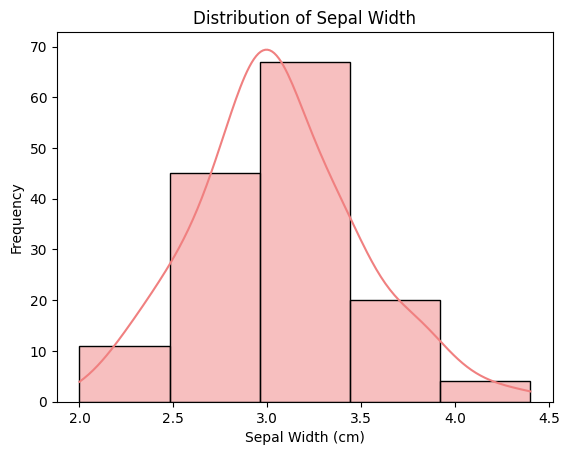

In [ ]:
sns.histplot(df['sepal_width'], bins=5, kde=True, color='lightcoral')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

The highest frequency is at 70 which ranges between the sepal length, between 3.0 - 3.5 cm

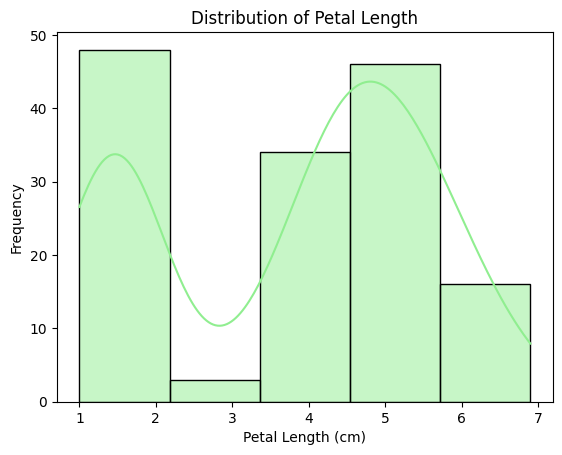

In [ ]:
# distribution of petal length
sns.histplot(df['petal_length'], bins=5, kde=True, color='lightgreen')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

The highest frequency is close to 50 which ranges between the petal length, between 1 - 2 cm

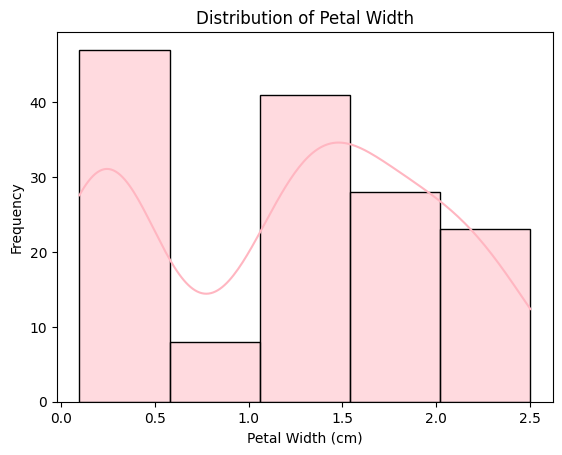

In [ ]:
sns.histplot(df['petal_width'], bins=5, kde=True, color='lightpink')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()


The highest frequency is close to 50 which ranges between the petal width, between 0.0 - 0.5 cm

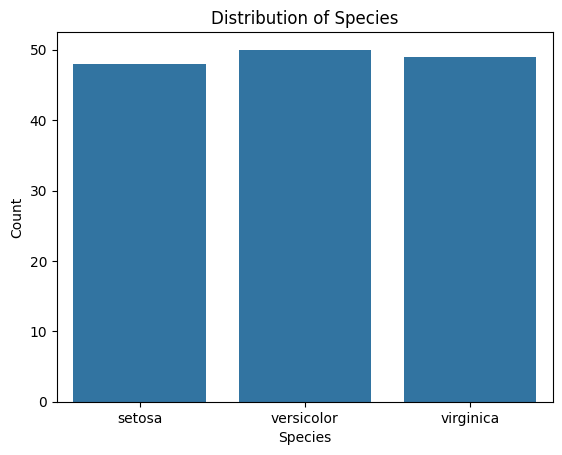

In [ ]:
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

versicolor is the highest recorded species

### 6.2 Bivariate Analysis

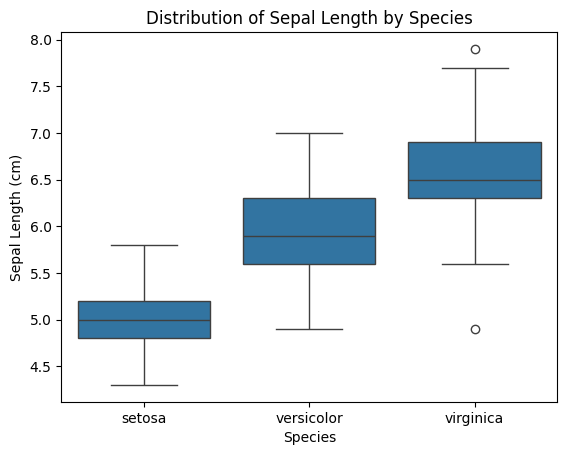

In [ ]:
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

Setosa has the smallest sepals, Versicolor lies in the middle range, and Virginica has the longest sepals.

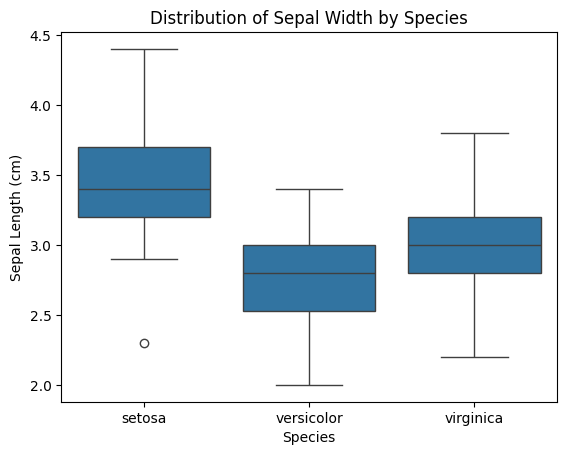

In [ ]:
sns.boxplot(data=df, x='species', y='sepal_width')
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

Setosa tends to have the widest sepals, Versicolor the narrowest, and Virginica falls in between

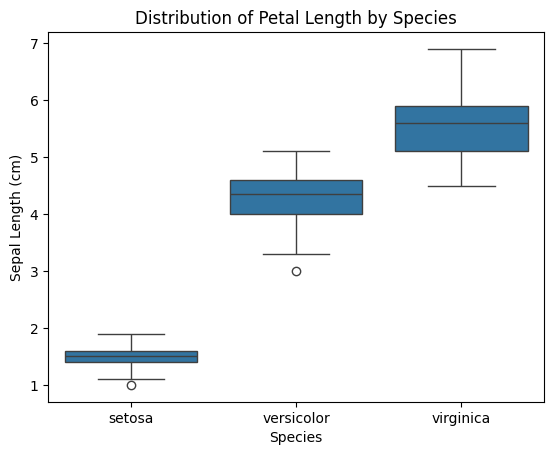

In [ ]:
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

Setosa has the smallest petals, Versicolor lies in the middle range, and Virginica has the longest petals.

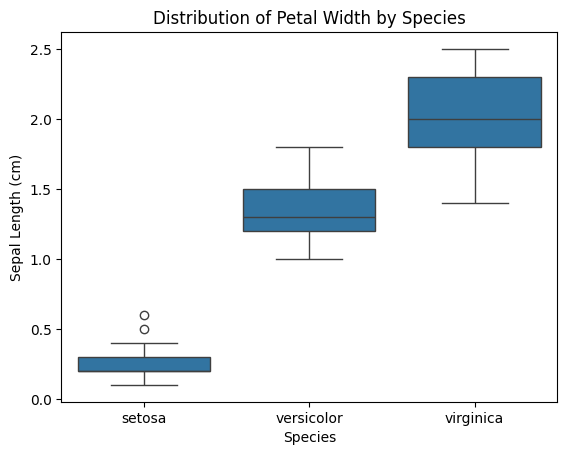

In [ ]:
sns.boxplot(data=df, x='species', y='petal_width')
plt.title('Distribution of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

Setosa tends to have the smallest petal width, Virginica has the largest petal width, and Versicolor falls in between

## 7 Modelling

In [ ]:
# Preparing features and labels
X = df.drop(columns=['species'])
y = df['species']

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
# fitting the model
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the model
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

Conclusion: the model has an accuracy score of 96.67%